# **Welcome to Linear Regression Handson**

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 EDA

- -> null values
- -> duplicates values
- -> unwanted data or data columns
- -> outliers (find and remove)
- -> label encoding
- -> Feature/column selection
- -> building model


In [2]:
# import the required dataset 
df = pd.read_csv(r'D:\Intellipaat\Datasets\New_insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


## Exploratory Data Analysis

In [3]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [4]:
# check no. of null values for each column
df.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [5]:
# Check the percentage of null value of each column 
df.isna().sum()*100/len(df)

age                                0.672646
sex                                0.000000
bmi                                0.224215
children                           0.373692
smoker                             0.000000
Claim_Amount                       1.046338
past_consultations                 0.448430
num_of_steps                       0.224215
Hospital_expenditure               0.298954
NUmber_of_past_hospitalizations    0.149477
Anual_Salary                       0.448430
region                             0.000000
charges                            0.000000
dtype: float64

Here take age column, age = 0.67, so it means out of all values(data) of 'age' 0.67% are null values.

In [6]:
# Display the rows having at least 1 null value
df[df.isnull().any(axis=1)].head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
5,18.0,male,34.43,0.0,no,26488.339120,20.0,717162.0,3696160.701,0.0,NaN,southeast,1137.4697
8,18.0,male,43.01,0.0,no,9715.650411,17.0,NaN,9216440.479,0.0,5.888197e+07,southeast,1149.3959
11,19.0,male,20.30,0.0,no,1920.136268,NaN,695430.0,3786542.068,0.0,2.747072e+06,southwest,1242.2600
12,19.0,male,20.70,0.0,no,3927.892067,4.0,723928.0,5013944.643,NaN,9.462889e+07,southwest,1242.8160
13,19.0,male,27.60,0.0,no,46780.546480,8.0,701227.0,NaN,0.0,3.842163e+07,southwest,1252.4070


In [7]:
# if null values are very less:
#         Dropping the null
# else:
#         Imputing the null values:
#                     if datatypes of data is numeric:  replacing by mean/ median
#                     else: replacing by mode if the datatype is object
            # in case we have null values use below code
                        # df["sex"].fillna(df["sex"].mode()[0])
                        # df["bmi"].fillna(df["bmi"].mean())

In [8]:
# drop all the rows having null value
df.dropna(inplace=True)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [9]:
# check for the duplicate record
df.duplicated().sum()

0

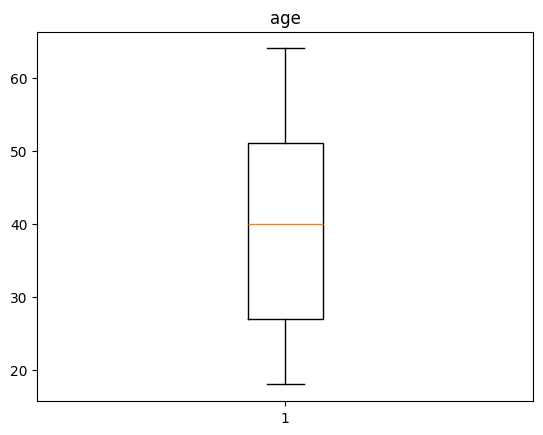

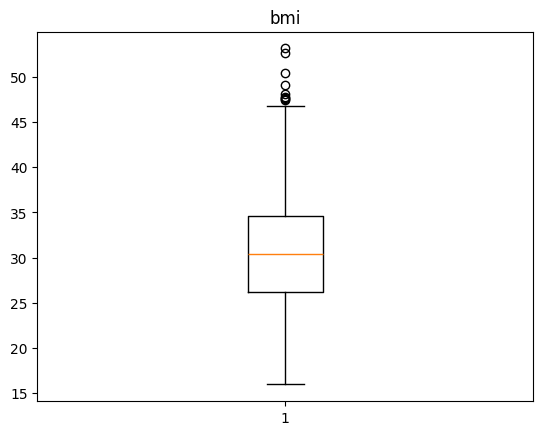

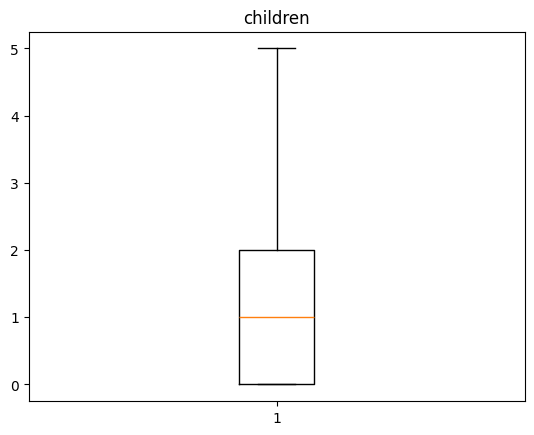

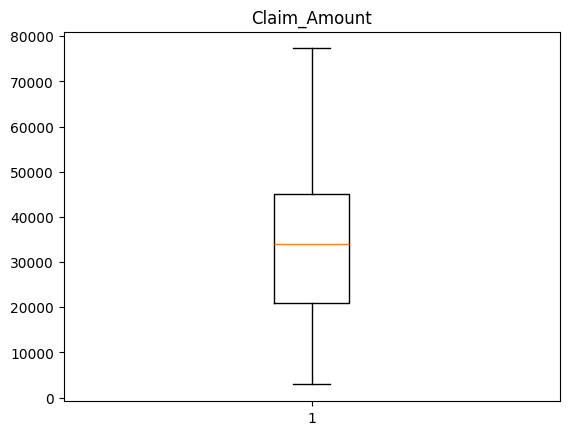

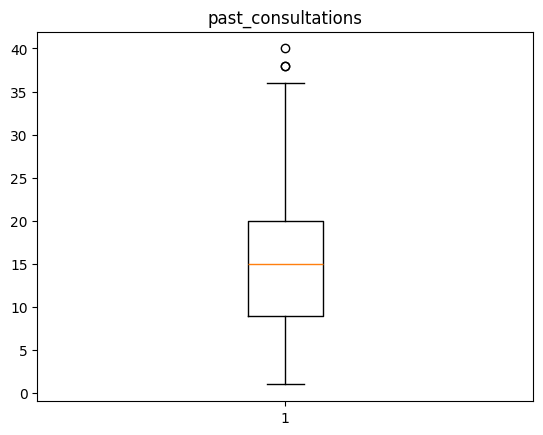

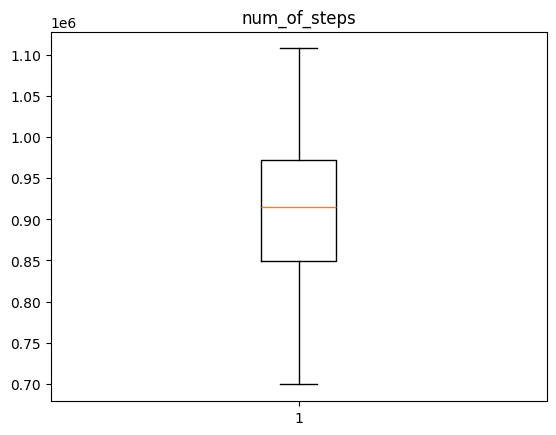

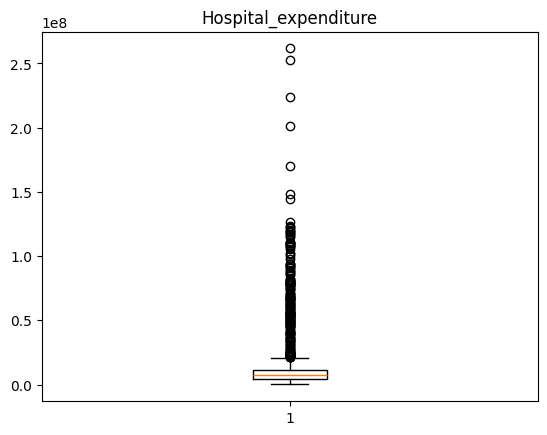

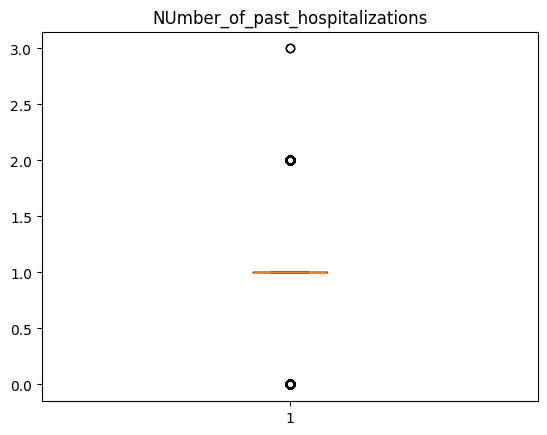

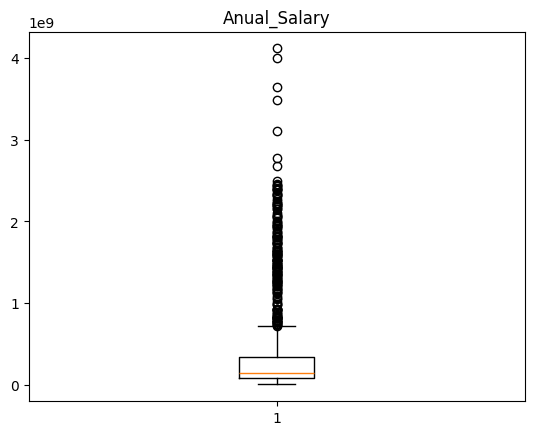

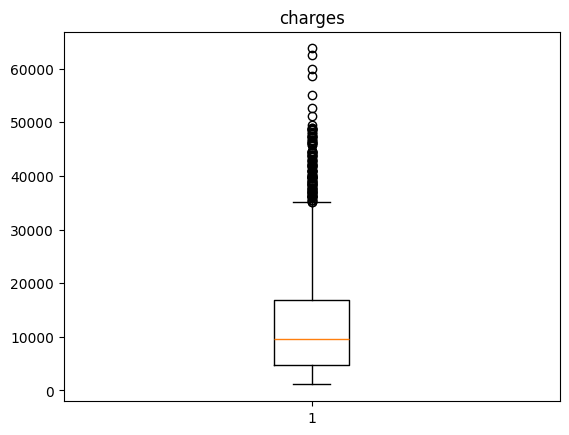

In [10]:
# display the box plot to analyze which column have outliers
for i in df.columns:
    if df[i].dtype != 'object':
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

In [11]:
df["NUmber_of_past_hospitalizations"].value_counts()

NUmber_of_past_hospitalizations
1.0    927
2.0    221
0.0    137
3.0      2
Name: count, dtype: int64

Here we see that No. of past hospitalizations having 4 unique value and in which one value has more than 70% of data, <br/>
due to this the plot has taken other values as outliers which are actually not and we can see that it didn't make the proper box. <br/>
 So this column will not taken as outliers containing column.

In [12]:
# see that which column are having outliers
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [13]:
# Create an array of the columns having outliers
outliers_column = ['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary', 'charges']

In [14]:
# Deal with the outliers (by IQR)
for i in outliers_column:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

In [15]:
# check the dataframe (no. of rows)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,male,20.13,2.0,yes,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,southeast,18767.73770
1041,24.0,female,27.60,0.0,no,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017
1046,29.0,female,27.94,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.90,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400


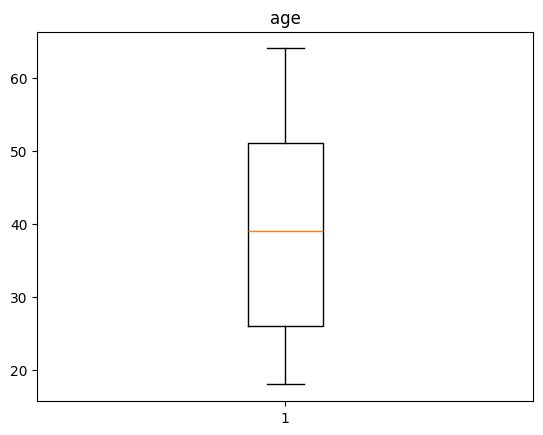

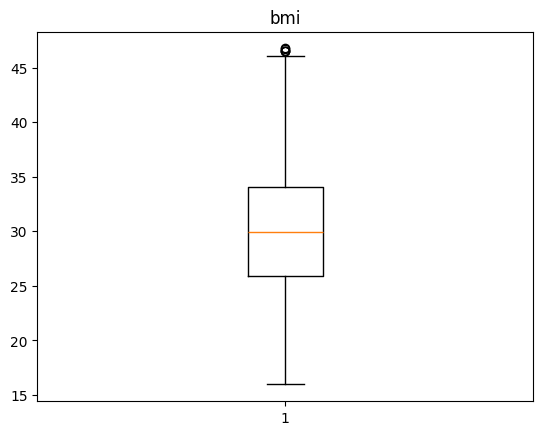

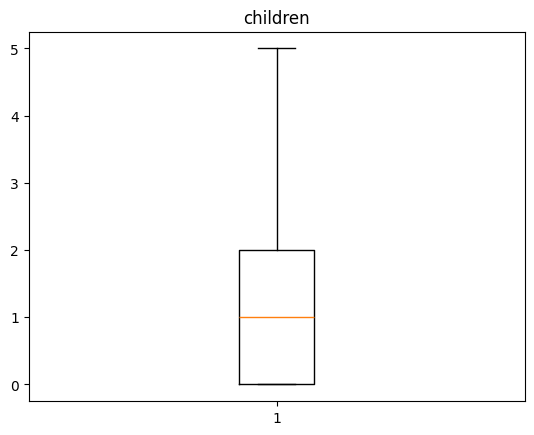

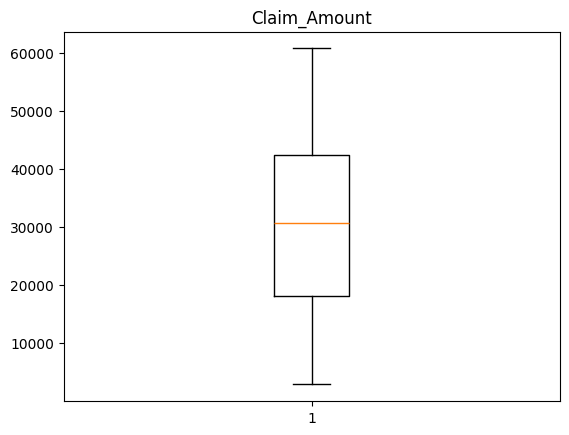

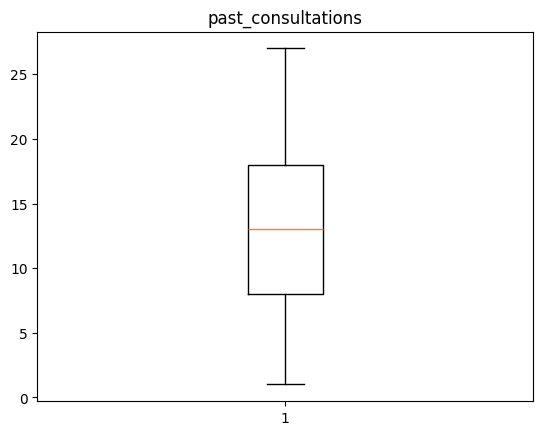

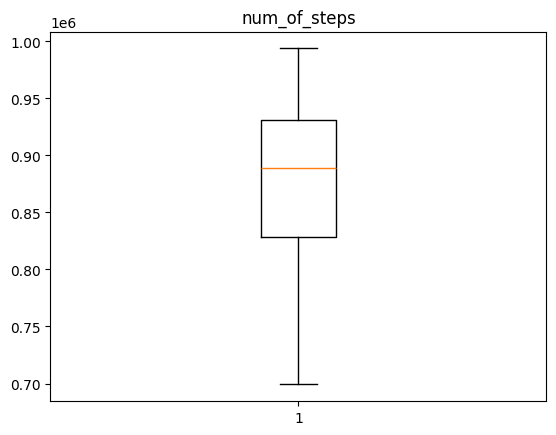

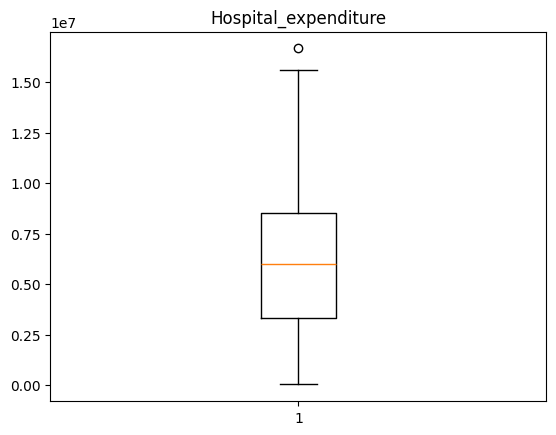

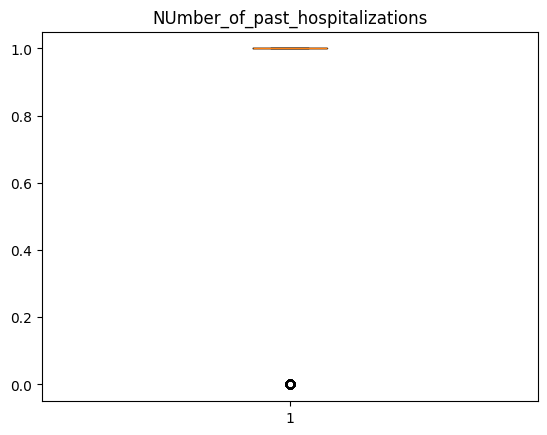

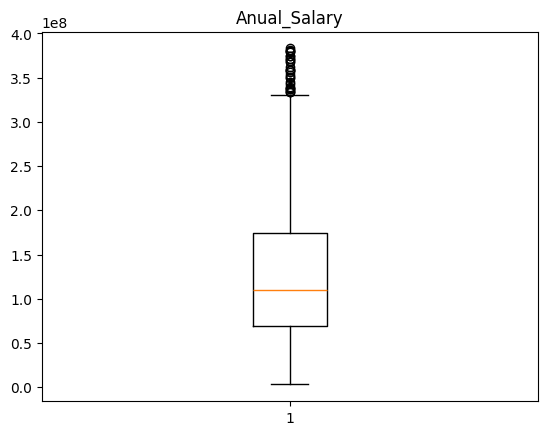

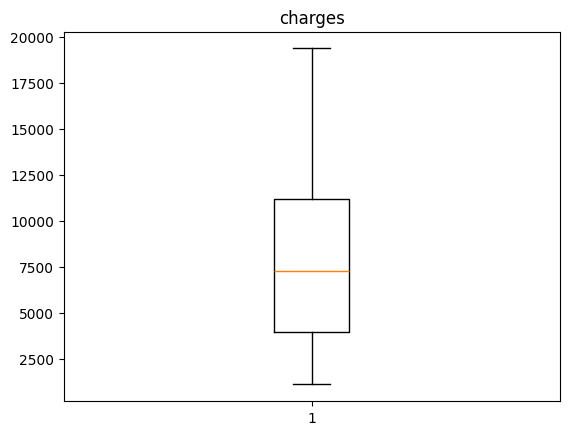

In [16]:
# check whether the outliers removed or not
for i in df.columns:
  if df[i].dtype!='object':
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

Here we can see some plot are showing the outliers especially 'anual_salary', but they are not. <br/> <br/>
**Reason** :- <br/>
When we removed the outliers with the IQR method the extreme outliers which were far away from lower limit <br/>
or upper limit were removed, now the value which are nearby the limits became new outliers which can be ignored because <br/> 
it won't affect out target variable, so we will not treat them as outliers.

In [17]:
# Analyze DataFrame
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,male,20.13,2.0,yes,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,southeast,18767.73770
1041,24.0,female,27.60,0.0,no,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017
1046,29.0,female,27.94,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.90,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400


In [18]:
# import LabelEncoder class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                             # le is an instance of LabelEncoder class

This LabelEncoder is the class from sklearn which is used to convert the string(category) to numerical value based on alphabetical order like, <br/> <br/>
**gender** :- <br/>
men & women, <br/>
so alphabet wise women(w) comes first <br/> 
so women - 0, men - 1 <br/> <br/>
**direction** :- <br/>
east - 0, north - 1, south - 2, west - 3

In [19]:
# convert the string(category) values to numerical
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [20]:
# check the final dataframe
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2,18767.73770
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3,18955.22017
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400


In [21]:
# check the dtype of columns in final data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 1050
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              986 non-null    float64
 1   sex                              986 non-null    int32  
 2   bmi                              986 non-null    float64
 3   children                         986 non-null    float64
 4   smoker                           986 non-null    int32  
 5   Claim_Amount                     986 non-null    float64
 6   past_consultations               986 non-null    float64
 7   num_of_steps                     986 non-null    float64
 8   Hospital_expenditure             986 non-null    float64
 9   NUmber_of_past_hospitalizations  986 non-null    float64
 10  Anual_Salary                     986 non-null    float64
 11  region                           986 non-null    int32  
 12  charges                   

In [22]:
# Check the correlation of all columns with target variable
df.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.003647,0.157363,0.046903,-0.205838,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.018011,0.682315
sex,-0.003647,1.000000,0.010777,0.022200,0.020767,-0.033575,0.001858,-0.058674,-0.004635,-0.082260,-0.025345,-0.017551,-0.039046
bmi,0.157363,0.010777,1.000000,0.012556,-0.203690,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.160247,0.019630
children,0.046903,0.022200,0.012556,1.000000,-0.028992,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.049654,0.131216
smoker,-0.205838,0.020767,-0.203690,-0.028992,1.000000,0.144309,0.141036,0.297142,0.274776,0.084012,0.506264,-0.016182,0.435330
Claim_Amount,0.106907,-0.033575,0.013019,0.037777,0.144309,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.004817,0.194932
past_consultations,0.178307,0.001858,0.017543,0.043747,0.141036,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.022856,0.286770
num_of_steps,0.763756,-0.058674,0.043881,0.219064,0.297142,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,-0.044130,0.942969
Hospital_expenditure,0.161881,-0.004635,0.013951,-0.008496,0.274776,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.019383,0.366163
NUmber_of_past_hospitalizations,0.527364,-0.082260,0.022507,0.309678,0.084012,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,-0.049122,0.532328


<Axes: >

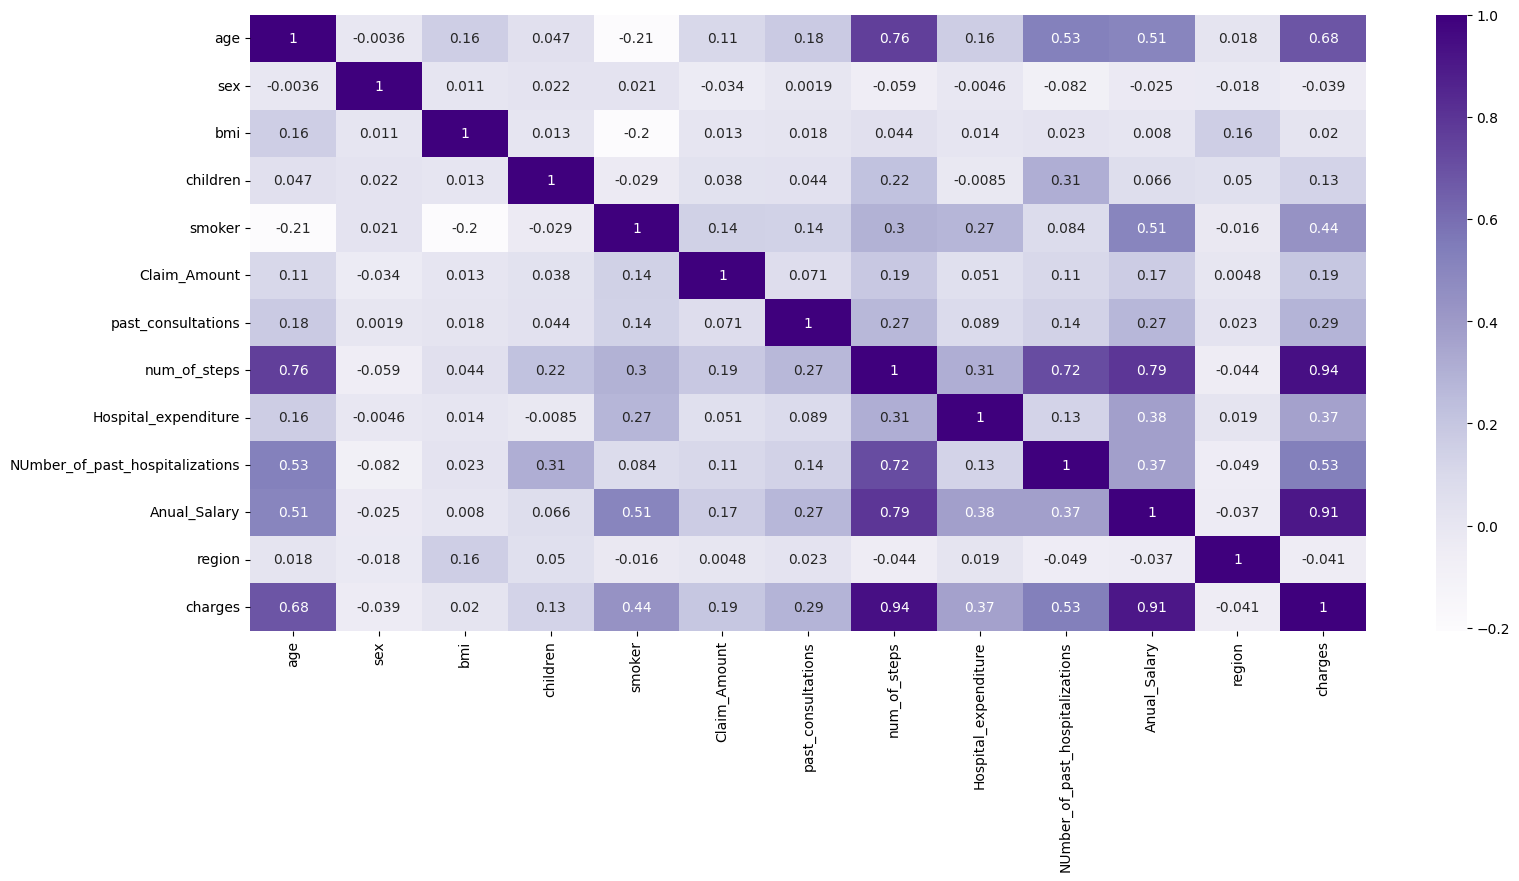

In [23]:
# Check the correlation of all columns with target variable (via Heatmap)
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap="Purples")

In [24]:
# Initailize independent & dependent variables
X = pd.DataFrame(df[['Anual_Salary', 'num_of_steps', 'age', 'NUmber_of_past_hospitalizations', 'smoker']])
y = pd.DataFrame(df['charges'])
X.head()

,Anual_Salary,num_of_steps,age,NUmber_of_past_hospitalizations,smoker
0,55784970.05,715428.0,18.0,0.0,0
1,13700885.19,699157.0,18.0,0.0,0
2,73523107.27,702341.0,18.0,0.0,0
3,75819679.60,700250.0,18.0,0.0,0
4,23012320.01,711584.0,18.0,0.0,0


In [25]:
y.head()

,charges
0,1121.8739
1,1131.5066
2,1135.9407
3,1136.3994
4,1137.0110


In [26]:
# Get the train & test data from train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)

In [27]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(788, 5)
(198, 5)
(788, 1)
(198, 1)


In [28]:
# import Linear Regression class
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
# fitting the model / training the model
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# intercept
model.intercept_            # Beta 0

array([-33520.98986426])

In [31]:
# coefficient
model.coef_                 # Beta 1

array([[ 1.65196970e-05,  4.52025386e-02,  2.80025869e+01,
        -1.84817816e+03,  2.19413944e+03]])

In [32]:
# Get the y_predicted from model & convert into df
y_predicted = model.predict(X_test)                                     # Got y_predicted in array type
y_predicted = pd.DataFrame(y_predicted, columns=['y_pred'])             # converting into df
y_predicted

,y_pred
0,951.962963
1,2779.073650
2,6784.155753
3,1250.779729
4,7262.698749
...,...
193,2113.021228
194,8590.366142
195,12133.554456
196,8753.792999


In [33]:
# Editing the dataframe of actual y (y_test)
y_test.rename(columns={'charges' : 'y_actual'}, inplace=True)       # renaming 'charges' to 'y_actual'
y_test.reset_index(inplace=True)                                    # reset index to start from 0
y_test.drop(columns='index', inplace=True)                          # dropping additional index column created by 'reset_index'
y_test

,y_actual
0,1877.92940
1,3070.80870
2,6389.37785
3,2585.85065
4,7726.85400
...,...
193,1708.92575
194,8932.08400
195,12730.99960
196,8280.62270


In [34]:
# concatenate y_actual & y_predicted to analyze(see) the difference (between both) manually
pd.concat([y_test, y_predicted], axis=1)

,y_actual,y_pred
0,1877.92940,951.962963
1,3070.80870,2779.073650
2,6389.37785,6784.155753
3,2585.85065,1250.779729
4,7726.85400,7262.698749
...,...,...
193,1708.92575,2113.021228
194,8932.08400,8590.366142
195,12730.99960,12133.554456
196,8280.62270,8753.792999


In [35]:
# import metrics 
from sklearn import metrics

In [36]:
# Metrics

# MAE (Mean Absolute Error)
MAE = metrics.mean_absolute_error(y_test, y_predicted)

# MSE (Mean Squared Error)
MSE = metrics.mean_squared_error(y_test, y_predicted)

# RMSE (Root Mean Squared Error)
RMSE = metrics.root_mean_squared_error(y_test, y_predicted)

# Print the error values
print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE :", RMSE)

MAE : 578.7940179564702
MSE : 563476.4918262057
RMSE : 750.6507122665013


In [37]:
# R^2_score (Coefficient of determination)
R2 = metrics.r2_score(y_test, y_predicted)
print("R2_score :-",R2)
print(f"Accuracy of model :- {round(R2*100, 2)} %")

R2_score :- 0.9682331907045432
Accuracy of model :- 96.82 %


But R2_score can also be incresed due to multiple independent variables, so we need to check adjusted R2_score.

In [38]:
# Needed for Adjusted R2
n = len(X_test)                     # Total no. of observation/rows
k = len(X_test.iloc[0])             # Total no. of independent variables

In [39]:
# Adjusted R^2   (used when there are multiple variables)
Adj_R2 = (1 - ((1 - R2)*(n - 1) / (n - k - 1)))
print("Adjusted R2_score :-", Adj_R2)
print(f"Accuracy of model :- {round(Adj_R2*100, 2)} %")

Adjusted R2_score :- 0.9674059300458073
Accuracy of model :- 96.74 %


Here we can see Adj_R2 is very close to R2_score, so we can say :- 

-> the model is actually explaining the 97 % variance <br/>
-> loosely we can interpret it 97 % accurate

END

---